# Hola Gabriel!

Mi nombre es David Bautista, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

# Comentario General

~~Hola, Gabriel, te felicito por el desarrollo del proyecto hasta el momento. Ahora bien, he dejado diferentes comentarios para que los pueda revisar y tener en cuenta para la siguiente entrega. Quedo atento.~~ </div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

# Comentario General #2

~~Hola, Gabriel. Buen trabajo con las modificaciones. Ahora bien, he dejado nuevos comentarios etiquetados con el #2 para que los puedas revisar, sobre todo el que tiene el subtítulo **Comentario Importante #2**~~</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

# Comentario General #3

Hola, Gabriel. Te felicito por la culminación del proyecto. Muy buen trabajo. </div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Perfecto, Gabriel. Buen trabajo importando las librerías necesarias para el desarrollo del proyecto. 
</div>

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
megaline_calls = pd.read_csv("/datasets/megaline_calls.csv")  
megaline_internet = pd.read_csv("/datasets/megaline_internet.csv")
megaline_messages = pd.read_csv("/datasets/megaline_messages.csv")
megaline_plans = pd.read_csv("/datasets/megaline_plans.csv")
megaline_users = pd.read_csv("/datasets/megaline_users.csv")



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Excelente, buen trabajo cargando los datasets necesarios para el desarrollo del proyecto. 
</div>

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
megaline_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
megaline_plans.duplicated().sum()

megaline_plans.isna().sum()

megaline_plans.head()



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-info">
<b>Observacion</b> <a class="tocSkip"></a>

El dataframe no muestra valores ausentes, ni valores duplicados, presenta solo dos entradas las cuales representan los planes disponibles y sus caracteristicas, los datos son de punto flotante, enteros y string lo cual esta correcto, solo que el orden de las columnas me parece incorrecto.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo usando los métodos ``head()`` e ``info()`` para explorar de manera inicial el contenido de la tabla, así mismo buen trabajo identificando si existían registros duplicados o valores nulos. 
</div>

## Corregir datos

In [5]:
df_megaline_plans = megaline_plans[['plan_name'] + megaline_plans.columns[:-1].tolist()]


In [6]:
df_megaline_plans.head()

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~Buen trabajo cambiando el orden de las columnas, en últimas no es algo necesario, pero concuerdo contigo en que este cambio permite leer la información de una manera más "razonable" y fácil. Por otro lado, no veo correcto que realices las multiplicaciones en las columnas de los precios, ya que de este modo estás modificando lo que en realidad cuesta cada menos y cada minuto.~~ 
    

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>  

Buen trabajo con la modificación.  

</div>

## Enriquecer los datos

In [7]:
df_megaline_plans["mb_per_month_included"] = df_megaline_plans["mb_per_month_included"] / 1024
df_megaline_plans.rename(columns={"mb_per_month_included": "gb_per_month_included"}, inplace=True)
df_megaline_plans.head()

,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15.0,500,20,10,0.03,0.03
1,ultimate,1000,30.0,3000,70,7,0.01,0.01


<div class="alert alert-block alert-info">
<b>Observacion</b> <a class="tocSkip"></a>

Cambie la columna plan_name al principio para que tuviera mas sentido y elimine un cero de las columnas usd_per_message y usd_per_minute para simplificar los valores, cambie de mb a gb la columna mb_per_month_included y tambien cambie su nombre a gb_per_month_included
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~Podrías intentar transformar las unidades de la columna ``mb_per_month_included`` de MB a GB (también tendrías que cambiar el nombre de la columna para que tenga, sentido), recuerda que el factor de conversión en este caso es que 1 GB -> 1024 MB~~
    

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>  

Perfecto, Buen trabajo.
</div>

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
megaline_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Imprime una muestra de datos para usuarios
megaline_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<div class="alert alert-block alert-info">
<b>Observacion</b> <a class="tocSkip"></a>

Este dataframe presenta 466 datos ausentes en la columna churn_date.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo realizando la exploración inicial del contenido de la tabla con información de los usuarios. Asimismo, buen trabajo usando el método ``info()`` para concluir sobre la presencia de valores nulos, fíjate que a veces tan solo con este método ya podemos deducir mucho del contenido de una tabla. 
    
Ahora bien, si te fijas, estos valores nulos más allá de ser nulos, tienen un significado, y es que esos clientes cuentan con un plan activo, por ende no existe una ``churn_date`` o fecha de cancelación. 
</div>

### Corregir los datos

In [10]:
megaline_users.fillna("Active", inplace=True)
megaline_users["reg_date"] = pd.to_datetime(megaline_users["reg_date"])
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Active


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~Buen trabajo con la modificación del campo nulo en la columna ``churn_date``; sin embargo, yo colocaría un string que haga referencia a que son usuarios activos, tal como que comenté en el apartado anterior.~~ 
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~No olvides que puedes cambiar el formato de la variable ``reg_date`` de object a tipo datetime.~~ 
 </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>  

Genial, buen trabajo con la modificación.  

</div>

### Enriquecer los datos

In [11]:
megaline_users["month"] = megaline_users["reg_date"].dt.month

<div class="alert alert-block alert-info">
<b>Observacion</b> <a class="tocSkip"></a>
    
Este dataframe solo presenta valores ausentes, los cuales remplace por la palabra "Active", tambien cambie reg_date a un objeto tipo datetime y agregue la columna month.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Buen trabajo. 
 </div>

## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
megaline_calls.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas
megaline_calls.head(20)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


<div class="alert alert-block alert-info">
<b>Observacion</b> <a class="tocSkip"></a>
    
Este dataframe no presenta valores asuntes ni duplicados, considero que los datos tienen el formato correcto y no presentan errores, no considero que se deban corregir o enriquecer, sin embargo la columna id parece estar de sobra ya que la columna user_id parece proporcionar informacion mas precisa.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Perfecto, Gabriel. Buen trabajo explorando de manera inicial el contenido de la tabla con información sobre las llamadas. Ahora bien, respecto a tu comentario sobre la columna id, en el contexto del proyecto puede que el id de los registros efectivamente no sea tan importante, sin embargo en otros casos puede ser fundamental por si se quiere estudiar algo especifico de un registro.
 </div>

### Corregir los datos

In [14]:

megaline_calls.rename(columns={"id": "call_id"}, inplace=True)
megaline_calls["call_date"] = pd. to_datetime(megaline_calls["call_date"])

megaline_calls.head()

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~En este caso, es fundamental poder modificar el tipo de dato de la columna ``date`` a datetime.~~
 </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>  

Perfecto. 
</div>

### Enriquecer los datos

In [15]:
megaline_calls["month"] = megaline_calls["call_date"].dt.month


In [16]:
megaline_calls

,call_id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~Habiendo realizado el cambio descrito en el comentario anterior, sería fundamental poder extraer una columna que haga referencia al mes del registro. Esto es importante para más adelante poder hacer los agrupamientos y merges necesarios.~~ </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo. 

</div>

## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
megaline_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Imprime una muestra de datos para los mensajes
megaline_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<div class="alert alert-block alert-info">
<b>Observacion</b> <a class="tocSkip"></a>
    
Este dataframe no presenta valores asuntes ni duplicados, considero que los datos tienen el formato correcto y no presentan errores, no considero que se deban corregir o enriquecer, sin embargo la columna id parece estar de sobra ya que la columna user_id parece proporcionar informacion mas precisa.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Buen trabajo explorando de manera inicial el contenido de la tabla con información de los mensajes. En este caso reitero mis comentarios sobre el uso de la columna Id.  </div>

### Corregir los datos

In [19]:
megaline_messages.rename(columns={"id": "message_id"}, inplace=True)
megaline_messages["message_date"] = pd. to_datetime(megaline_messages["message_date"])

megaline_messages.head()

,message_id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~Nuevamente, es importante modificar el tipo de dato de la columna ``date``. De hecho, también te recomendaría que no modifiques los nombres originales de las columnas, ya que después, si queremos hacer merges podrían repetirse columnas con el mismo nombre ``date``. ~~ </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>  

Buen trabajo. 
</div>

### Enriquecer los datos

In [20]:
megaline_messages["month"] = megaline_messages["message_date"].dt.month


In [21]:
megaline_messages

,message_id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~Para esta tabla también es importante poder crear una columna que haga referencia al mes de la fecha del registro en específico. ~~  </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>  

Buen trabajo. 

</div>

## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet
megaline_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [23]:
# Imprime una muestra de datos para el tráfico de internet
megaline_internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<div class="alert alert-block alert-info">
<b>Observacion</b> <a class="tocSkip"></a>
    
Este dataframe no presenta valores asuntes ni duplicados, considero que los datos tienen el formato correcto y no presentan errores, no considero que se deban corregir o enriquecer, sin embargo la columna id parece estar de sobra ya que la columna user_id parece proporcionar informacion mas precisa.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

Buen trabajo desarrollando la exploración inicial del contenido del dataset. Ahora bien, tal como en los ejercicios anteriores veo que comentas que no son necesarias modificaciones; sin embargo, ya hemos visto que es importante aplicar algunas.    </div>

### Corregir los datos

In [24]:
megaline_internet.rename(columns={"id": "session_id"}, inplace=True)
megaline_internet["session_date"] = pd. to_datetime(megaline_internet["session_date"])
megaline_internet["mb_used"] = np.ceil(megaline_internet["mb_used"] / 1024)
megaline_internet.rename(columns={"mb_used": "gb_used"}, inplace=True)
megaline_internet.head()




,session_id,user_id,session_date,gb_used
0,1000_13,1000,2018-12-29,1.0
1,1000_204,1000,2018-12-31,0.0
2,1000_379,1000,2018-12-28,1.0
3,1000_413,1000,2018-12-26,1.0
4,1000_442,1000,2018-12-27,1.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~Nuevamente, es importante modificar el tipo de dato de la columna ``date``. Por otro lado, sería interesante que logres modificar la variable ``mb_used`` para tener el registro en GB y no MB.~~  </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>  

Buen trabajo con la modificación.  

</div>

### Enriquecer los datos

In [25]:
megaline_internet["month"] = megaline_internet["session_date"].dt.month
megaline_internet.head()

,session_id,user_id,session_date,gb_used,month
0,1000_13,1000,2018-12-29,1.0,12
1,1000_204,1000,2018-12-31,0.0,12
2,1000_379,1000,2018-12-28,1.0,12
3,1000_413,1000,2018-12-26,1.0,12
4,1000_442,1000,2018-12-27,1.0,12


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~Nuevamente, es importante poder crear una columna que haga referencia al mes de la fecha del registro en específico.~~   </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>  

Perfecto.

</div>

## Estudiar las condiciones de las tarifas

In [26]:
df_megaline_plans.head()

,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15.0,500,20,10,0.03,0.03
1,ultimate,1000,30.0,3000,70,7,0.01,0.01


En el plan Surf se paga mensualmente 20 dolares, se cobran 10 por cada GB extra consumido fuera del plan, 0.03 por cada mensaje consumido fuera del plan y 0.03 por cada minuto consumido fuera del plan.

En el plan Ultimate se paga mensualmente 70 dolares, se cobran 7 por cada GB extra consumido fuera del plan, 0.01 por cada mensaje consumido fuera del plan y 0.01 por cada minuto consumido fuera del plan.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~No olvides estructurar un pequeño estudio de las condiciones de cada plan.~~   </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>  

Buen trabajo.    </div>

In [27]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
call_megaline_calls = megaline_calls.groupby(["user_id", "month"]).agg({"duration":["sum", "count"]})
call_megaline_calls.columns=["total_minutos", "total_llamadas"]
call_megaline_calls = call_megaline_calls.reset_index() 
call_megaline_calls

,user_id,month,total_minutos,total_llamadas
0,1000,12,116.83,16
1,1001,8,171.14,27
2,1001,9,297.69,49
3,1001,10,374.11,65
4,1001,11,404.59,64
...,...,...,...,...
2253,1498,12,324.77,39
2254,1499,9,330.37,41
2255,1499,10,363.28,53
2256,1499,11,288.56,45


In [28]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messa_megaline_messages = megaline_messages.groupby(["user_id", "month"])["message_date"].count().reset_index()
messa_megaline_messages.columns=["user_id", "month", "total_mensajes"]
messa_megaline_messages



,user_id,month,total_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [29]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
mb_megaline_internet = megaline_internet.groupby(["user_id", "month"])["gb_used"].sum().reset_index()
mb_megaline_internet.columns=["user_id", "month", "total_gb"] 
mb_megaline_internet

,user_id,month,total_gb
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0
...,...,...,...
2272,1498,12,56.0
2273,1499,9,37.0
2274,1499,10,52.0
2275,1499,11,43.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~~Recuerda que, a la hora de estructurar las tablas agrupadas, se deben tener en cuenta dos variables de agrupación, el id del usuario, pero también del mes del registro. De modo que debes crear dicha variable tal como lo he descrito en comentarios anteriores, para en este apartado modificar las tablas agrupadas.~~~   </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo estructurando las tres tablas agrupadas.  </div>

<div class="alert alert-block alert-info">
<b>Observacion</b> <a class="tocSkip"></a>
    
Aqui intente hacer el merge de los distintos dataframes que se me pidieron, al principio si se habian unido, pero despues ya salia el error, incluso habia incluido "date" (on=["user_id", "date"])en todos para que conincidieran las fechas, pero no se porque no funciona.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

~~Los merge se deben hacer teniendo en cuenta las variables del id de cada usuario y del mes de registro, (las mismas usadas para la estructuración de las tablas agrupadas). Por otro lado, fíjate que usas un ``inner`` como método de agrupación, de modo que solo te quedas con usuarios que tengan información en todos los servicios, lo cual no es correcto en este caso. En vez de eso, debes usar un método como ``outer``, el cual te permite mantener todos los registros.~~    </div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

**Comentario Importante #2**

~~Gabriel, la lógica de tu primer merge es incorrecta, fíjate que estás uniendo la tabla agrupada con info de las llamadas por cliente y mes con la tabla de llamadas total en la que vienen todos los registros y la cual tuviste que agrupar, los merge se tienen que hacer es entre las diferentes tablas agrupadas .~~

In [30]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month


msj_m_megaline_calls = call_megaline_calls.merge(messa_megaline_messages, on=["user_id", "month"], how="outer")
mb_msj_m_megaline_calls = msj_m_megaline_calls.merge(mb_megaline_internet, on=["user_id", "month"], how="outer")

mb_msj_m_megaline_calls



,user_id,month,total_minutos,total_llamadas,total_mensajes,total_gb
0,1000,12,116.83,16.0,11.0,4.0
1,1001,8,171.14,27.0,30.0,21.0
2,1001,9,297.69,49.0,44.0,41.0
3,1001,10,374.11,65.0,53.0,50.0
4,1001,11,404.59,64.0,36.0,49.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,27.0
2289,1361,5,NaN,NaN,2.0,7.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,2.0


In [31]:
# Añade la información de la tarifa
plan_mb_msj_m_megaline_calls = mb_msj_m_megaline_calls.merge(megaline_users, on="user_id", how="outer")
plan_mb_msj_m_megaline_calls.dropna()
plan_mb_msj_m_megaline_calls



,user_id,month_x,total_minutos,total_llamadas,total_mensajes,total_gb,first_name,last_name,age,city,reg_date,plan,churn_date,month_y
0,1000,12.0,116.83,16.0,11.0,4.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Active,12
1,1001,8.0,171.14,27.0,30.0,21.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active,8
2,1001,9.0,297.69,49.0,44.0,41.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active,8
3,1001,10.0,374.11,65.0,53.0,50.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active,8
4,1001,11.0,404.59,64.0,36.0,49.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,Active,12
2299,1319,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,Active,6
2300,1378,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,Active,12
2301,1463,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,Active,11


In [32]:
m_plan_mb_msj_m_megaline_calls = plan_mb_msj_m_megaline_calls.merge(df_megaline_plans, left_on="plan", right_on="plan_name")
m_plan_mb_msj_m_megaline_calls

,user_id,month_x,total_minutos,total_llamadas,total_mensajes,total_gb,first_name,last_name,age,city,...,churn_date,month_y,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,116.83,16.0,11.0,4.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,Active,12,ultimate,1000,30.0,3000,70,7,0.01,0.01
1,1006,11.0,9.32,2.0,15.0,7.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,11,ultimate,1000,30.0,3000,70,7,0.01,0.01
2,1006,12.0,54.79,9.0,139.0,62.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,11,ultimate,1000,30.0,3000,70,7,0.01,0.01
3,1008,10.0,450.21,71.0,21.0,48.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,Active,8,ultimate,1000,30.0,3000,70,7,0.01,0.01
4,1008,11.0,422.81,63.0,37.0,56.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,Active,8,ultimate,1000,30.0,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",...,Active,10,surf,50,15.0,500,20,10,0.03,0.03
2299,1307,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",...,Active,12,surf,50,15.0,500,20,10,0.03,0.03
2300,1319,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",...,Active,6,surf,50,15.0,500,20,10,0.03,0.03
2301,1378,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",...,Active,12,surf,50,15.0,500,20,10,0.03,0.03


<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>  


Excelente, buen trabajo realizando los merge correspondientes. 

In [33]:
def minutos_extra(row): 
    
    plan = row["plan"]
    total_minutos = row["total_minutos"]
    minutes_included = row["minutes_included"]
    usd_per_minute = row["usd_per_minute"]
    if total_minutos > minutes_included:
            return (total_minutos-minutes_included)*usd_per_minute
    else:
            return 0

m_plan_mb_msj_m_megaline_calls['minutos_extra'] = m_plan_mb_msj_m_megaline_calls.apply(minutos_extra, axis=1)

def gb_extra(row): 
    
    
    plan = row["plan"]
    total_gb = row["total_gb"]
    usd_per_gb = row["usd_per_gb"]
    gb_per_month_included = row["gb_per_month_included"]
    if plan == "surf":
        if total_gb > gb_per_month_included:
            return (total_gb-gb_per_month_included)*usd_per_gb
        else:
            return 0
    if plan == "ultimate": 
        if total_gb > gb_per_month_included:
            return (total_gb-gb_per_month_included)*usd_per_gb
    else:
            return 0
        
m_plan_mb_msj_m_megaline_calls['gb_extra'] = m_plan_mb_msj_m_megaline_calls.apply(gb_extra, axis=1)

def mensajes_extra(row): 
    
    plan = row["plan"]
    total_mensajes = row["total_mensajes"]
    messages_included = row["messages_included"]
    usd_per_message = row["usd_per_message"]
    
    if plan == "surf":
        if total_mensajes > messages_included:
            return (total_mensajes-messages_included)*usd_per_message
    else:
            return 0
    if plan == "ultimate":
        if total_mensajes > messages_included:
            return (total_mensajes-messages_included)*usd_per_message
    else:
            return 0
    
m_plan_mb_msj_m_megaline_calls['mensajes_extra'] = m_plan_mb_msj_m_megaline_calls.apply(mensajes_extra, axis=1)

m_plan_mb_msj_m_megaline_calls['usd_monthly_pay'] = m_plan_mb_msj_m_megaline_calls['usd_per_minute'] + m_plan_mb_msj_m_megaline_calls['minutos_extra'] + m_plan_mb_msj_m_megaline_calls['gb_extra'] + m_plan_mb_msj_m_megaline_calls['mensajes_extra'] 
m_plan_mb_msj_m_megaline_calls

,user_id,month_x,total_minutos,total_llamadas,total_mensajes,total_gb,first_name,last_name,age,city,...,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutos_extra,gb_extra,mensajes_extra
0,1000,12.0,116.83,16.0,11.0,4.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,1000,30.0,3000,NaN,7,0.01,0.01,0.0,NaN,0.0
1,1006,11.0,9.32,2.0,15.0,7.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,1000,30.0,3000,NaN,7,0.01,0.01,0.0,NaN,0.0
2,1006,12.0,54.79,9.0,139.0,62.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,1000,30.0,3000,224.01,7,0.01,0.01,0.0,224.0,0.0
3,1008,10.0,450.21,71.0,21.0,48.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,1000,30.0,3000,126.01,7,0.01,0.01,0.0,126.0,0.0
4,1008,11.0,422.81,63.0,37.0,56.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,1000,30.0,3000,182.01,7,0.01,0.01,0.0,182.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",...,50,15.0,500,0.03,10,0.03,0.03,0.0,0.0,0.0
2299,1307,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",...,50,15.0,500,0.03,10,0.03,0.03,0.0,0.0,0.0
2300,1319,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",...,50,15.0,500,0.03,10,0.03,0.03,0.0,0.0,0.0
2301,1378,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",...,50,15.0,500,0.03,10,0.03,0.03,0.0,0.0,0.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo agregando los cálculos adicionales. 

## Estudia el comportamiento de usuario

### Llamadas

In [34]:
pivot_duracion = m_plan_mb_msj_m_megaline_calls.pivot_table(index= 'month_y', 
                                     columns = 'plan', 
                                     values= 'total_minutos', 
                                     aggfunc='mean').round(2)
pivot_duracion.columns = ['duracion_media_surf', 'duracion_media_ultimate']
pivot_duracion

,duracion_media_surf,duracion_media_ultimate
month_y,,
1,395.44,421.40
2,466.71,261.00
3,433.27,446.61
4,455.77,532.88
5,374.34,372.85
6,397.24,426.97
7,374.86,355.23
8,376.61,518.73
9,376.25,439.59


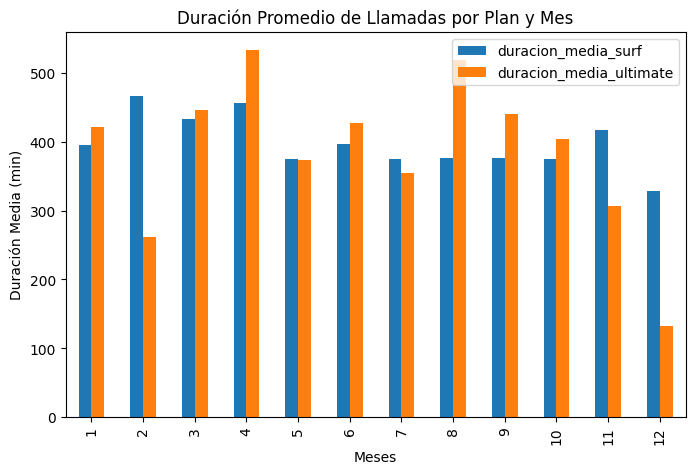

In [35]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
pivot_duracion.plot(kind='bar', figsize=(8,5), title="Duración Promedio de Llamadas por Plan y Mes")

plt.xlabel("Meses")
plt.ylabel("Duración Media (min)")


plt.show()

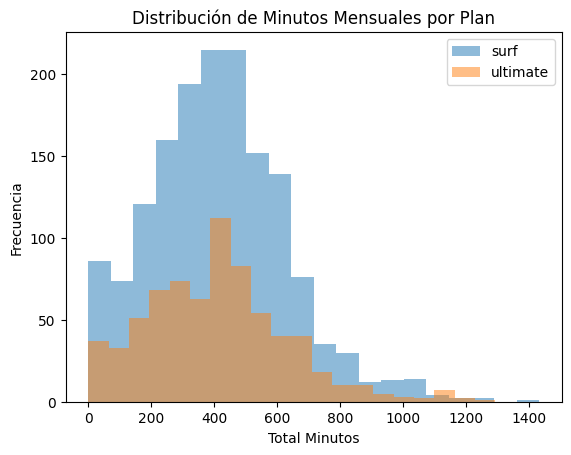

In [36]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
m_plan_mb_msj_m_megaline_calls.groupby("plan")["total_minutos"].plot(kind="hist", bins=20, alpha=0.5, legend=True)

plt.xlabel("Total Minutos")
plt.ylabel("Frecuencia")
plt.title("Distribución de Minutos Mensuales por Plan")
plt.show()

In [37]:
# Calcula la media y la varianza de la duración mensual de llamadas.


caja = m_plan_mb_msj_m_megaline_calls.groupby('month_x').agg(media_llamadas = ('total_llamadas','mean'),varianza_llamadas = ('total_llamadas','var'))
caja

,media_llamadas,varianza_llamadas
month_x,,
1.0,28.666667,247.866667
2.0,51.600000,1043.400000
3.0,46.285714,903.798319
4.0,48.478873,822.538833
5.0,57.298077,1022.560773
6.0,58.304965,773.742047
7.0,62.039106,1205.195091
8.0,59.086957,1021.110309
9.0,59.649819,921.431277


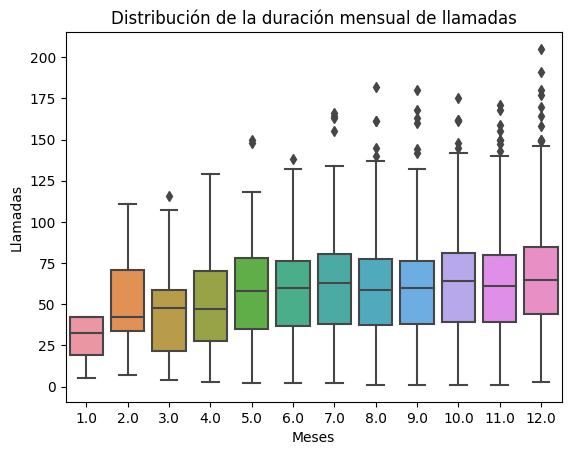

In [38]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(y="total_llamadas", x="month_x", data=m_plan_mb_msj_m_megaline_calls)
plt.title("Distribución de la duración mensual de llamadas")
plt.ylabel("Llamadas")
plt.xlabel("Meses")

plt.show()

La mediana de las llamadas aumenta a lo largo de los meses, lo que puede indicar que el numero de llamadas se incrementa al pasar de los meses o que las llamadas duran mas. 

De Mayo a Diciembre la cantidad de valores atipicos se incrementa, puede ser que el numero de llamadas se incremento demasiado o que puede haber algun error en el dataframe o durante el proceso de corregir y enriquecer los datos por lo cual seria correcto verificarlos para encontrar su origen.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>  

Perfecto, buen trabajo desarrollando el estudio de las llamadas. 

### Mensajes

<AxesSubplot:title={'center':'Mensajes enviados por plan'}, xlabel='Meses', ylabel='Numero de mensajes enviados'>

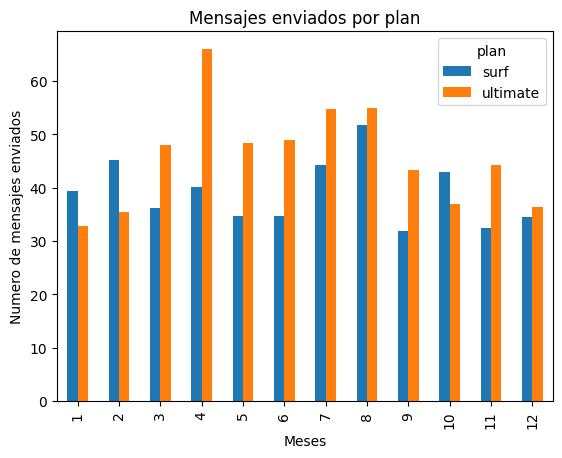

In [39]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

mensajes_por_mes = m_plan_mb_msj_m_megaline_calls.pivot_table(index= "month_y", 
                                     columns = "plan", 
                                     values= "total_mensajes")

mensajes_por_mes.plot(kind= "bar", title= "Mensajes enviados por plan", xlabel="Meses", ylabel="Numero de mensajes enviados")

La cantidad de mensajes enviados por los usuarios del plan Ultimate superan en la mayoria de los meses a los mensajes enviados por usuarios del plan Surf, lo que nos indica que la cantidad de mensajes incluidos en Ultimate (1000) es una excelente opcion para para la mayoria de sus usuarios, por otro lado los mensajes incluidos de Surf (50) no satisface la necesidad de sus usuarios ya que en Agosto fue la unica ocasion en que superaron el numero de mensajes incluidos y el resto del año ni si quiera usuaron los mensajes por completo, lo cual podria indicar que estos usuarios se limitaban a usar este beneficio por el escaso numero de mensajes incluidos.

(0.0, 50.0)

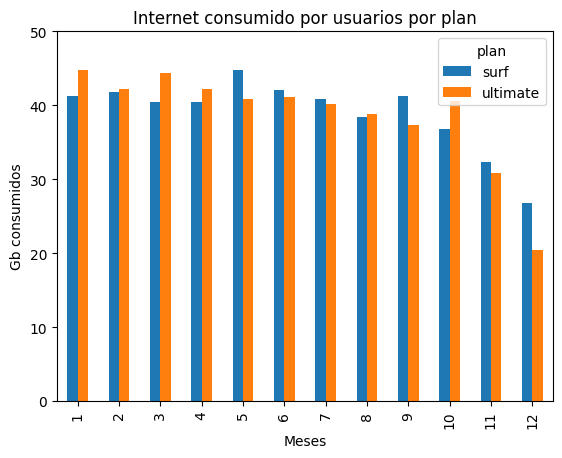

In [40]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

gb_por_plan = m_plan_mb_msj_m_megaline_calls.pivot_table(index= 'month_y', 
                                     columns = "plan", 
                                     values= "total_gb")

gb_por_plan.plot(kind= 'bar',  title= 'Internet consumido por usuarios por plan', xlabel="Meses", ylabel="Gb consumidos")                                                         
plt.ylim([0, 50])

El consumo de GB del plan Surf supera el limite de GB incluidos (15 GB) en el paquete, lo cual podria sugerir que esta cantidad de GB no es suficiente para satisfacer la necesidad de sus usuarios por lo cual seria una buena idea incrementar la cantidad de GB incluidos para asi asegurar un incremento en el numero de usuarios en este plan y asi atraer mas usuarios que podrian migrar en el futuro al plan Ultimate.
El consumo de GB de los usuarios del plan Ultimate tambien rebasa el limite de GB incluidos (30 GB) pero no lo hacen de manera tan desproporcionado como en Surf, el unico mes en donde no se rebaso el limite fue Diciembre, un incremento de 10 GB podria satisfacer la necesidad de la mayoria de sus usuarios y eso podria garantizar su permanencia en el plan por mas tiempo. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>  

Excelente, Gabriel. Buen trabajo desarrollando el estudio de los mensajes. 

### Internet

La cantidad de GB incluidos en ambos planes no es suficiente para satisfacer las necesidades de los usuarios.

El costo de GB extras en ambos planes es alto, si se bajaran los precios y se incrementaran el numero de GB incluidos en ambos planes podria propiciar un incremento de usuarios ya que serian una opcion mas competitiva en el mercado

El comportamiento de los usuarios no varia mucho en funcion al plan que tienen ya que para ambos planes los usuarios agotan los GB incluidos practicamente todo el tiempo ya que no es suficiente la cantidad de GB para la demanda de los usuarios.

## Ingreso

Los usuarios del plan Ultimate no sobrepasan el limite de lo que incluye el plan tan frecuentemente, al parecer les es suficiente a la mayoria.

Los usuarios del plan Surf sobrepasan el limite de lo que incluye el plan de manera mas frequente.

Los usuarios del plan Surf pagan mas por los consumos extras que mes con mes realizan, muchos de ellos les convendria cambiar al plan Ultimate que incluye mas GB, mensajes, minutos y llamadas.
Los usuarios del plan Ultimate no pagan costros extras con tanta frecuencia ya que este plan les ofrece lo suficiente para cubrir sus necesidades del mes.

## Prueba las hipótesis estadísticas

In [41]:
pivot_ingreso = m_plan_mb_msj_m_megaline_calls.pivot_table(index= 'month_x', 
                                                           columns = 'plan', 
                                                           values= 'usd_monthly_pay', 
                                                           aggfunc='mean')
pivot_ingreso.columns = ['ingreso_media_surf', 'ingreso_media_ultimate']
drop_pivot_ingreso = pivot_ingreso.dropna().reset_index()
drop_pivot_ingreso

,month_x,ingreso_media_surf,ingreso_media_ultimate
0,2.0,167.620067,131.610000
1,3.0,186.689826,204.010000
2,4.0,161.684700,127.876667
3,5.0,205.446973,114.237273
4,6.0,236.074137,104.392353
5,7.0,264.813926,122.276667
6,8.0,265.145772,128.061724
7,9.0,259.988849,114.449394
8,10.0,278.410043,121.827073
9,11.0,259.425598,123.123402


In [42]:
# Prueba las hipótesis
ingreso_promedio_surf = drop_pivot_ingreso["ingreso_media_surf"]


ingreso_promedio_ultimate = drop_pivot_ingreso["ingreso_media_ultimate"]



alpha = 0.05

results = st.ttest_ind(ingreso_promedio_surf, ingreso_promedio_ultimate) 

print('valor p:', results.pvalue)

if results.pvalue < alpha: 
    print("Los ingresos son iguales")
else:
    print("Los ingresos no son iguales")

valor p: 2.402674677096739e-06
Los ingresos son iguales


In [43]:
# Prueba las hipótesis

alpha = 0.05

ingreso_promedio_nynj = m_plan_mb_msj_m_megaline_calls[m_plan_mb_msj_m_megaline_calls["city"].str.contains("NY-NJ")]["usd_monthly_pay"].dropna()
ingreso_promedio_areas = m_plan_mb_msj_m_megaline_calls.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')["usd_monthly_pay"].dropna()

results = st.ttest_ind(ingreso_promedio_nynj, ingreso_promedio_areas)

print("p-value: ", results.pvalue)

if results.pvalue < alpha:
    print("Los ingresos son iguales")
else:
    print("Los ingresos no son iguales")

p-value:  0.0029188350659906342
Los ingresos son iguales


<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>  

Buen trabajo con el desarrollo de las pruebas. 

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Aumento en la mediana de llamadas: A lo largo del año, la cantidad o duración de las llamadas tiende a incrementarse.

Más valores atípicos de mayo a diciembre: Puede deberse a un aumento en las llamadas o a errores en la gestión de datos, por lo que es recomendable verificar su origen.

Los GB incluidos en ambos planes son insuficientes para cubrir la demanda de los usuarios.

Mensajes en cada plan:

Los usuarios de Ultimate (1000 mensajes) usan este beneficio con frecuencia, lo que indica que es una buena opción para ellos.

Los usuarios de Surf (50 mensajes) apenas los utilizan, posiblemente porque la cantidad es muy baja.

Consumo de GB:

Surf supera con frecuencia el límite de 15 GB, lo que sugiere que el plan necesita más datos para ser competitivo.

Ultimate también supera los 30 GB incluidos, aunque no de forma tan extrema. Un aumento de 10 GB podría mejorar la satisfacción y retención de clientes.

Costo de GB extra elevado: Reducirlo e incluir más GB en los planes haría que la oferta sea más competitiva en el mercado.

Comportamiento de los usuarios similar en ambos planes: En general, los clientes agotan sus GB mensuales, indicando que la oferta actual no cubre sus necesidades.

Usuarios de Surf pagan más por consumos extra: Muchos podrían beneficiarse al cambiarse a Ultimate, que incluye más minutos, mensajes y datos.

Usuarios de Ultimate rara vez pagan extras, ya que el plan cubre la mayoría de sus necesidades.

Los ingresos de los dos planes son iguales de acuerdo a la hipotesis.

Los ingresos de las Areas NY-NJ y el restos de las areas son iguales de acuerdo a la hipotesis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>  

Buen trabajo.